# 1. How did the COVID-19 pandemic impact ABC Company’s parcel business?

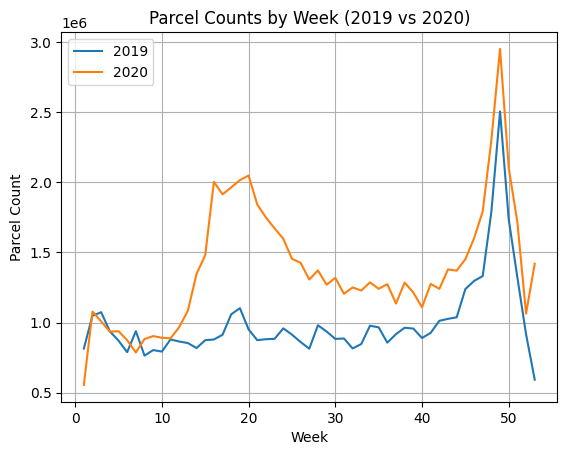

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('COVID_Parcel_Business.csv')

enterprise_range = (500000, float('inf'))
large_range = (200000, 500000)
medium_range = (10000, 200000)
small_range = (1000, 10000)

# Filter data for the years 2019 and 2020
df_2019 = df[df['THE_YEAR'] == 2019]
df_2020 = df[df['THE_YEAR'] == 2020]

# Group data by week and sum the parcel count
df_2019_weekly = df_2019.groupby('THE_WEEK')['VOLUME'].sum().reset_index()
df_2020_weekly = df_2020.groupby('THE_WEEK')['VOLUME'].sum().reset_index()

# Display the week-wise parcel counts for 2019
#print("Week-wise parcel counts for 2019:")
#print(df_2019_weekly)

# Display the week-wise parcel counts for 2020
#print("\nWeek-wise parcel counts for 2020:")
#print(df_2020_weekly)


# Plot the line chart
plt.plot(df_2019_weekly['THE_WEEK'], df_2019_weekly['VOLUME'], label='2019')
plt.plot(df_2020_weekly['THE_WEEK'], df_2020_weekly['VOLUME'], label='2020')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Parcel Count')
plt.title('Parcel Counts by Week (2019 vs 2020)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# 2. When were customer volumes first impacted by COVID-19?

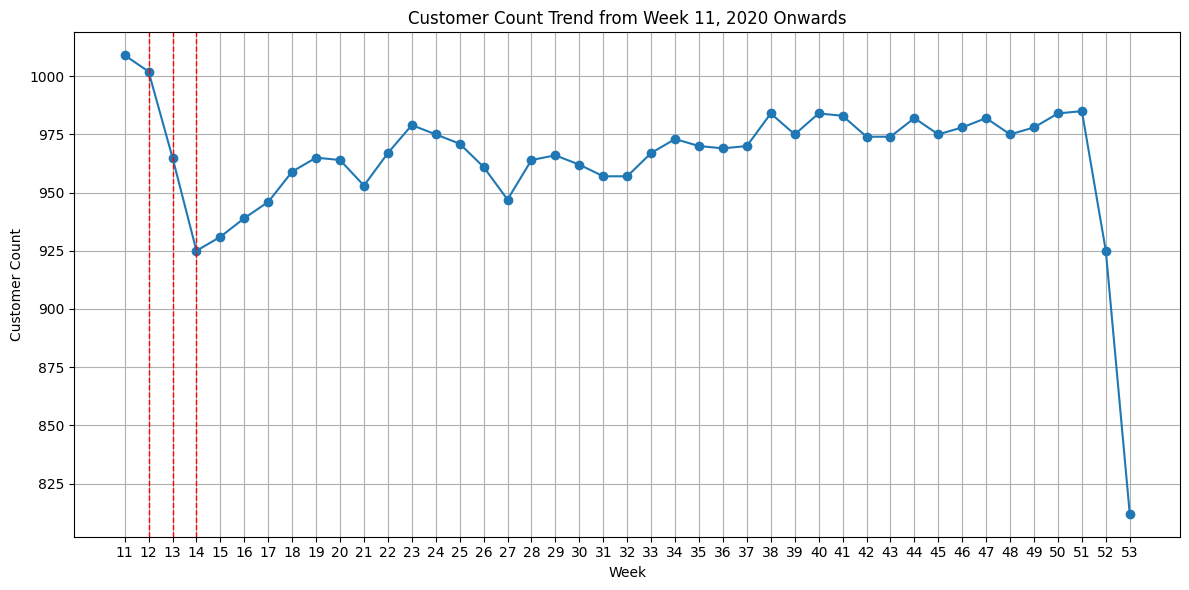

First 3 impacted weeks:
Week 12, Customer count: 1002
Week 13, Customer count: 965
Week 14, Customer count: 925
Trend: Decrease


In [3]:
# Filter data from Week 11, 2020 onwards
df_filtered = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 11)]

# Calculate total customer count for each week from Week 11, 2020 onwards
weekly_customer_count = df_filtered.groupby('THE_WEEK')['FakeCustomerID'].nunique().reset_index()

# Identify the first 3 consecutive weeks where the customer count decreased or increased
consecutive_impacted_weeks = weekly_customer_count[weekly_customer_count['FakeCustomerID'].diff().fillna(0) != 0].head(3)

# Determine the trend (increase or decrease) based on the first change
trend = 'Increase' if consecutive_impacted_weeks.iloc[0]['FakeCustomerID'] > weekly_customer_count.iloc[0]['FakeCustomerID'] else 'Decrease'

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(weekly_customer_count['THE_WEEK'], weekly_customer_count['FakeCustomerID'], marker='o', linestyle='-')
plt.title('Customer Count Trend from Week 11, 2020 Onwards')
plt.xlabel('Week')
plt.ylabel('Customer Count')
plt.grid(True)
plt.xticks(weekly_customer_count['THE_WEEK'])
plt.tight_layout()

# Highlighting the first 5 impacted weeks
for week in consecutive_impacted_weeks['THE_WEEK']:
    plt.axvline(x=week, color='r', linestyle='--', linewidth=1)

plt.show()

print(f"First 3 impacted weeks:")
for index, row in consecutive_impacted_weeks.iterrows():
    print(f"Week {int(row['THE_WEEK'])}, Customer count: {int(row['FakeCustomerID'])}")

print(f"Trend: {trend}")


# 3 . What events within the COVID timeline may have contributed to the change?

-Lockdowns and Stay-at-Home Orders (March 2020)

-Initial Panic Buying (March-April 2020)

-Increased online purchase

-Travel Restrictions led to increase in parcel volumes